<br>

# **Project**: <font color='red'> Car Prices Prediction </font> <br><br>
---


<br><br>
## **Purpose**
The purpose of this project is to practice in building, implementing and evaluating a Linear Regression Model.
<br><br>

## **Scenario**
I'm working in the XYZ Conculting Company as a ML Engineer. I'm asked from a Car Magazine to build a ML model to predict car prices by Friday so they can write a column about the upcoming car releases that brands has disclosed.
<br><br>
## **Mission** (the who, what, where, when, why)
My mission is, to build a machine learning model at the Co which can predict car prices for a Car Magazine by Friday.  
<br><br>

## **Execution** (how to)
For this project i need to find appropriate data. For this reason i asked the Data Engineering Dept to help me out. After that i organized the work to be done as follows (for educational purposes i'm the Data Engineering Dept 😀 ):


### [PART 0](#part0) (Data Extraction)
  * Libraries
  * Data Retreival

### [PART 1](#part1) (Data Curation)
* Data Pre-processing
* Data Exploration
* Data Transformation

### [PART 2](#part2) (Regression Model)
* Baseline Linear Regression Model
* Baseline Model Evaluation

### [PART 3](#part3) (Optimization)
* Feature Engineering
* Model Optimization
* Model Evaluation

<a name='part0'></a>
# <font color='green'>**PART 0**</font> (Data Extraction)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a name='dtcol'></a>
Data Acquisition

In [4]:
!wget -q --show-progress https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.05s   


Taking a glimpse of the dataset.

In [5]:
df = pd.read_csv('data.csv')
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [6]:
print(f'There are {df.shape[0]} records/examples and {df.shape[1]} features')

There are 11914 records/examples and 16 features


<a name='part1'></a>
# <font color='orange'>**PART 1**</font> (Data Transformation)

We can see our dataset's columns (features)

In [7]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

What the datatypes of the features are:

In [8]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

We can see some `stats derived from numeric feature values` of our dataset

In [9]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


We can observe that there is inconsistency in columns names regarding the case of the characters and also there are spaces or underscores in between, so we're going to change that.

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


We will do the same for the values of the features which are strings (in pandas the type 'object' is string), as follows:
* We first identify the columns where the values are strings, then
* We loop over those columns to transform the values accordingly

In [11]:
str_col = list(df.dtypes[df.dtypes == 'object'].index)
str_col

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [12]:
for col in str_col:
  df[col] = df[col].str.lower().str.replace(' ', '_')

df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


Next, we'll `exclude duplicates` since they don't provide any value to our research and it's a convinient practice to reset the index of the dataframe we're going to use.

In [13]:
df = df.drop_duplicates(keep='first').reset_index(drop=True)
len(df)

11199

Now, let's **check** for `missing values` in our dataset

In [14]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3376
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

* As we can observe, the feature we want to predict ('msrp') has no missing values; which is a good thing.
* Apart from that, we see that the feature 'market_category' has many missing values (3742). Now, we have some options here; either we delete these records or exclude this feature or to keep them or to fill them with appropriate values. At this point i'll choose to exclude this feature because of the nature of its values (multiple categorical values); i think it's not going to affect this radically our model.


In [15]:
df = df.drop(['market_category'], axis=1)
df.isna().sum()

make                  0
model                 0
year                  0
engine_fuel_type      3
engine_hp            69
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

Since the number of the remaining missing values are low compared to the total examples, i'll choose to exclude these records/examples. There are though different approaches to tackle this issue.

In [16]:
df = df.dropna(axis=0) # axis=0 related to rows, axis=1 --> columns
df.isna().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

Our target feature is the price of the vehicle 'msrp'. So, let's see how the values are distributed.

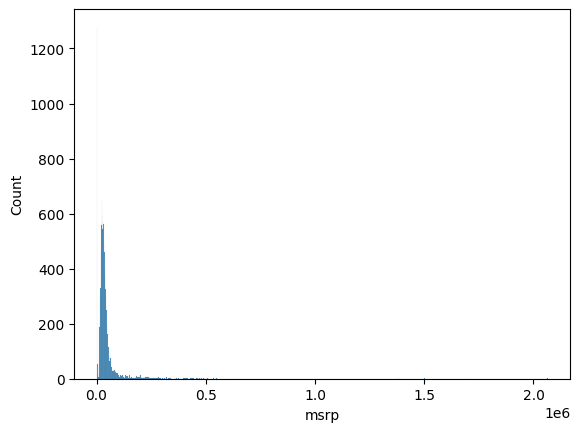

In [80]:
sns.histplot(df.msrp)
plt.show()

We can observe that the prices are right-skewed and there's a long tail, so let's narrow our search to prices lower than $200000

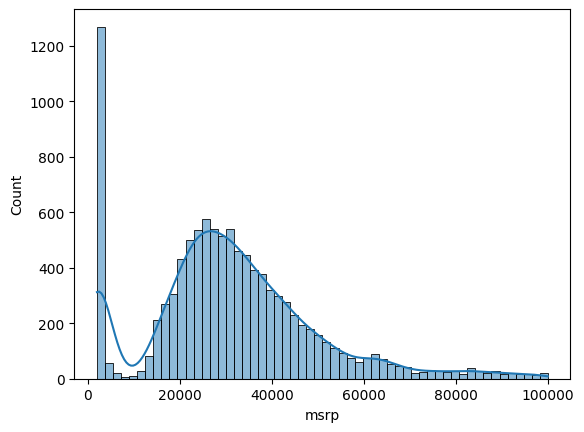

In [79]:
sns.histplot(df.msrp[df.msrp < 100000], kde=True)
plt.show()

Now we can perceive better how the prices are rolling throughout our dataset. Since the values are very large comparing to the rest of our dataset, a good practice is to log the values so to not 'confuse' the model.

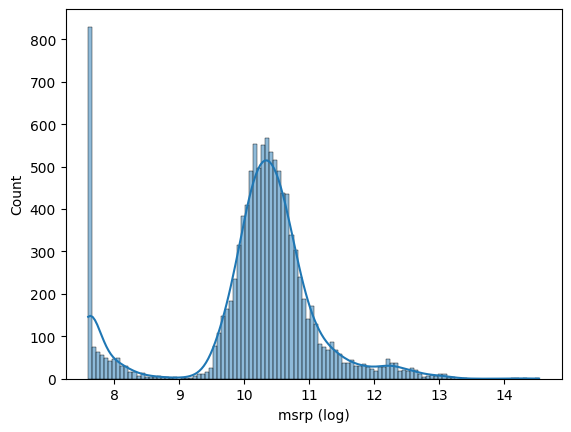

In [78]:
sns.histplot(np.log1p(df.msrp), kde=True)
plt.xlabel('msrp (log)')
plt.show()

We can see how the numerical features are correlated with each other

In [20]:
df_heat = df.corr()
df_heat

<ipython-input-20-15a565a50ea6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_heat = df.corr()


,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
year,1.000000,0.337297,-0.026670,0.246173,0.265597,0.220053,0.086580,0.209353
engine_hp,0.337297,1.000000,0.788319,-0.128493,-0.423734,-0.474810,0.041418,0.658983
engine_cylinders,-0.026670,0.788319,1.000000,-0.147591,-0.614703,-0.634460,0.042705,0.551988
number_of_doors,0.246173,-0.128493,-0.147591,1.000000,0.116920,0.137386,-0.058979,-0.145600
highway_mpg,0.265597,-0.423734,-0.614703,0.116920,1.000000,0.842834,-0.024927,-0.207774
city_mpg,0.220053,-0.474810,-0.634460,0.137386,0.842834,1.000000,-0.007238,-0.232699
popularity,0.086580,0.041418,0.042705,-0.058979,-0.024927,-0.007238,1.000000,-0.048490
msrp,0.209353,0.658983,0.551988,-0.145600,-0.207774,-0.232699,-0.048490,1.000000


We can visualize our correlation dataframe

<Axes: >

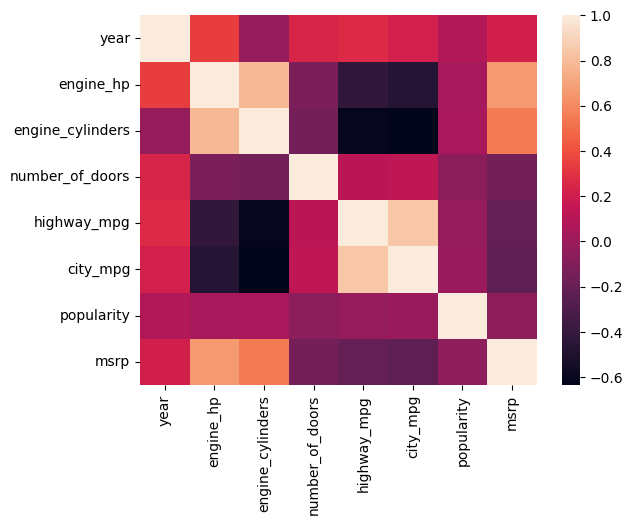

In [21]:
sns.heatmap(df_heat)

In [22]:
def split(data):
  np.random.seed(0)
  examples = len(data)

  # determining the number of examples the train-val-test sets will have
  num_train = int(examples * 0.7)
  num_val = int(examples * 0.1)
  num_test = examples - (num_train + num_val)
  print(f'train: {num_train} \t val: {num_val} \t test: {num_test}')

  # create an array containing the indices of the examples (ascending)
  idx = np.arange(examples)

  # shuffling the indices
  np.random.shuffle(idx)

  # shuffling our examples based on the index we created
  data_shuffled = data.iloc[idx]

  # spliting the dataframe into train-val-test sets
  data_train = data_shuffled.iloc[:num_train]
  data_val = data_shuffled.iloc[num_train:num_train + num_val]
  data_test  = data_shuffled.iloc[num_train + num_val:]

  # declaring the features and target values in train-val-test sets
  X_train = data_train.iloc[:, :-1].values
  y_train = np.log1p(data_train.iloc[:,-1].values)

  X_val = data_val.iloc[:, :-1].values
  y_val = np.log1p(data_val.iloc[:,-1].values)

  X_test = data_test.iloc[:, :-1].values
  y_test = np.log1p(data_test.iloc[:,-1].values)

  return X_train, X_val, X_test, y_train, y_val, y_test

For our model i'll use initially 2 features to see how it performs. Later on we can add more features to train our model.

In [23]:
features = ['engine_hp', 'city_mpg']
cols = features + ['msrp']
cols

['engine_hp', 'city_mpg', 'msrp']

In [24]:
X_train, X_val, X_test, y_train, y_val, y_test = split(df[cols])
print(f'The shape of X_train: {X_train.shape}')
print(f'The shape of y_train: {y_train.shape}\n')
print(f'The shape of X_val: {X_val.shape}')
print(f'The shape of y_val: {y_val.shape}\n')
print(f'The shape of X_test: {X_test.shape}')
print(f'The shape of y_test: {y_test.shape}')

train: 7767 	 val: 1109 	 test: 2221
The shape of X_train: (7767, 2)
The shape of y_train: (7767,)

The shape of X_val: (1109, 2)
The shape of y_val: (1109,)

The shape of X_test: (2221, 2)
The shape of y_test: (2221,)


<a name='part2'></a>
# <font color='blue'>**PART 2**</font> (Regression Model)

The solution to the Linear Regression approach hides under the acquisition of the weights: <br><br> $$W=(X^TX)^{-1}X^Ty$$

In [25]:
def linear_regression_fit(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  W = XTX_inv.dot(X.T).dot(y)
  return W[0], W[1:]

In [26]:
w_0, w = linear_regression_fit(X_train, y_train)

The predictions are made using the formula: $g(X)=w_0+Xw$

In [27]:
def linear_regression_predict(w_0, w, X):
  pred = w_0 + X.dot(w)
  return pred

In [28]:
y_train_pred = linear_regression_predict(w_0, w, X_train)

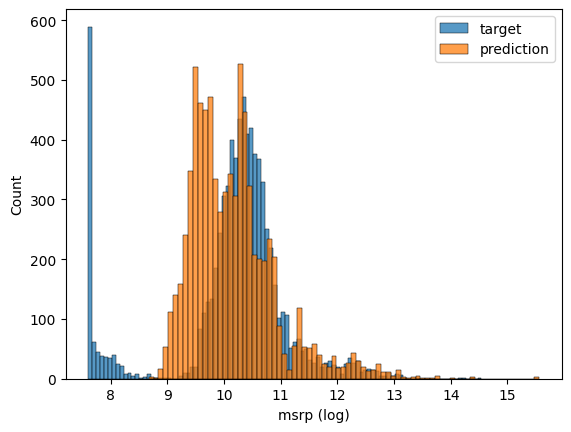

In [77]:
sns.histplot(y_train, label='target')
sns.histplot(y_train_pred, label='prediction')
plt.legend()
plt.xlabel('msrp (log)')
plt.show()

As we can observe, `the distribution of the predicted values differ from the target ones`. We can expect this since we only used 2 features to form our model. Let's eveluate our model using the RMSE (Root Mean Square Error) which is suitable for reggression models.

$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(g(x_i)-y_i)^2}$$

In [30]:
def rmse(prediction, target):
  error = prediction - target
  power = error**2
  mse = power.mean()
  rmse = np.sqrt(mse)
  return rmse

In [31]:
rmse_train = rmse(y_train_pred, y_train)
print(f'The RMSE of the model using the train set is: {rmse_train:.3f}')

The RMSE of the model using the train set is: 0.734


Let's validate our model using the val set.

In [32]:
y_val_pred = linear_regression_predict(w_0, w, X_val)
rmse_val = rmse(y_val_pred, y_val)
print(f'The RMSE of the model using the val set is: {rmse_val:.3f}')

The RMSE of the model using the val set is: 0.730


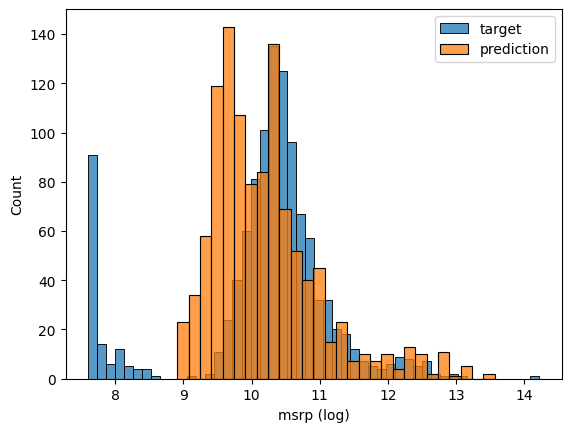

In [76]:
sns.histplot(y_val, label='target')
sns.histplot(y_val_pred, label='prediction')
plt.legend()
plt.xlabel('msrp (log)')
plt.show()

<a name='part3'></a>
# <font color='red'>**PART 3**</font> (Optimization)

The first thing we can think of is to `increase the feature set`.

In [34]:
features2 = ['engine_hp', 'city_mpg', 'popularity']
cols2 = features2 + ['msrp']
cols2

['engine_hp', 'city_mpg', 'popularity', 'msrp']

In [35]:
X_train2, X_val2, X_test2, y_train2, y_val2, y_test2 = split(df[cols2])
print(f'The shape of X_train2: {X_train2.shape}')
print(f'The shape of y_train2: {y_train2.shape}\n')
print(f'The shape of X_val2: {X_val2.shape}')
print(f'The shape of y_val2: {y_val2.shape}\n')
print(f'The shape of X_test2: {X_test2.shape}')
print(f'The shape of y_test2: {y_test2.shape}')

train: 7767 	 val: 1109 	 test: 2221
The shape of X_train2: (7767, 3)
The shape of y_train2: (7767,)

The shape of X_val2: (1109, 3)
The shape of y_val2: (1109,)

The shape of X_test2: (2221, 3)
The shape of y_test2: (2221,)


In [36]:
w_0_2, w_2 = linear_regression_fit(X_train2, y_train2)

In [37]:
y_val_pred2 = linear_regression_predict(w_0_2, w_2, X_val2)
rmse_val2 = rmse(y_val_pred2, y_val2)
print(f'The RMSE of the model using the val set is: {rmse_val2:.3f}')

The RMSE of the model using the val set is: 0.730


We can observe that <font color='red'>there isn't any improvement by adding this feature</font>. Let's try to create a new one. In our original dataset we have a feature 'year'. We can `create a new feature 'age'` which can be derived from the feature 'year' and work with it.

In [38]:
df_new = df[['engine_hp', 'city_mpg', 'msrp']].copy()
df_new.shape

(11097, 3)

In [39]:
df['year'].max()

2017

In [40]:
df_new['age'] = df['year'].apply(lambda x: df['year'].max() - x)
df_new.head(5)

,engine_hp,city_mpg,msrp,age
0,335.0,19,46135,6
1,300.0,19,40650,6
2,300.0,20,36350,6
3,230.0,18,29450,6
4,230.0,18,34500,6


In [41]:
cols3 = ['engine_hp', 'city_mpg', 'age', 'msrp']
cols3

['engine_hp', 'city_mpg', 'age', 'msrp']

In [42]:
X_train3, X_val3, X_test3, y_train3, y_val3, y_test3 = split(df_new[cols3])
print(f'The shape of X_train3: {X_train3.shape}')
print(f'The shape of y_train3: {y_train3.shape}\n')
print(f'The shape of X_val3: {X_val3.shape}')
print(f'The shape of y_val3: {y_val3.shape}\n')
print(f'The shape of X_test3: {X_test3.shape}')
print(f'The shape of y_test3: {y_test3.shape}')

train: 7767 	 val: 1109 	 test: 2221
The shape of X_train3: (7767, 3)
The shape of y_train3: (7767,)

The shape of X_val3: (1109, 3)
The shape of y_val3: (1109,)

The shape of X_test3: (2221, 3)
The shape of y_test3: (2221,)


In [43]:
w_0_3, w_3 = linear_regression_fit(X_train3, y_train3)

In [44]:
y_val_pred3 = linear_regression_predict(w_0_3, w_3, X_val3)
rmse_val3 = rmse(y_val_pred3, y_val3)
print(f'The RMSE of the model using the val set is: {rmse_val3:.3f}')

The RMSE of the model using the val set is: 0.514


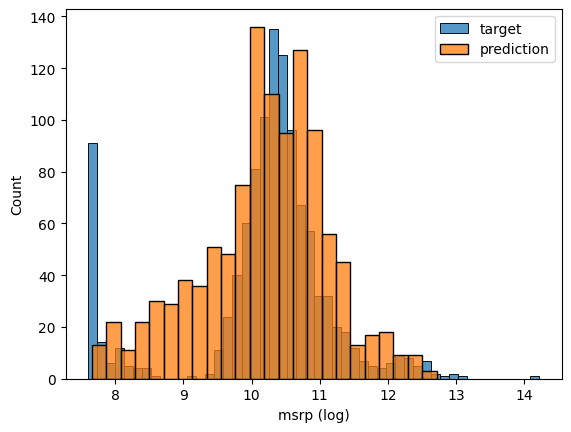

In [75]:
sns.histplot(y_val3, label='target')
sns.histplot(y_val_pred3, label='prediction')
plt.legend()
plt.xlabel('msrp (log)')
plt.show()

We can observe that `creating a new feature affects positively` to our model. But, can we do any better?? So far, we dealt with numerical features, yet we haven't used categorical ones. To tackle this problem we're going to use the `one-hot encoding to categorical features` we're going to use.

In [46]:
a = np.unique(df['number_of_doors'].astype(int)).astype(str)
a

array(['2', '3', '4'], dtype='<U21')

To encode this feature, we're going to create for every value a new feature which it'll get a 'true' value and the rest as 'false' for every example in our dataset.

In [47]:
df_new2 = df.copy()

for value in a:
  feature = f'number_of_doors_{value}'
  df_new2[feature] = (df_new2['number_of_doors'] == float(value)).astype(int)

In [48]:
df_new2.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,number_of_doors_2,number_of_doors_3,number_of_doors_4
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,26,19,3916,46135,1,0,0
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,19,3916,40650,1,0,0
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,20,3916,36350,1,0,0
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,18,3916,29450,1,0,0
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,18,3916,34500,1,0,0


In [49]:
df_new2['age'] = df['year'].apply(lambda x: df['year'].max() - x)
df_new2.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,number_of_doors_2,number_of_doors_3,number_of_doors_4,age
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,26,19,3916,46135,1,0,0,6
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,19,3916,40650,1,0,0,6
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,20,3916,36350,1,0,0,6
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,18,3916,29450,1,0,0,6
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,18,3916,34500,1,0,0,6


In [50]:
cols4 = ['engine_hp', 'city_mpg', 'age', 'number_of_doors_2', 'number_of_doors_3', 'number_of_doors_4', 'msrp']
cols4

['engine_hp',
 'city_mpg',
 'age',
 'number_of_doors_2',
 'number_of_doors_3',
 'number_of_doors_4',
 'msrp']

In [51]:
X_train4, X_val4, X_test4, y_train4, y_val4, y_test4 = split(df_new2[cols4])
print(f'The shape of X_train4: {X_train4.shape}')
print(f'The shape of y_train4: {y_train4.shape}\n')
print(f'The shape of X_val4: {X_val4.shape}')
print(f'The shape of y_val4: {y_val4.shape}\n')
print(f'The shape of X_test4: {X_test4.shape}')
print(f'The shape of y_test4: {y_test4.shape}')

train: 7767 	 val: 1109 	 test: 2221
The shape of X_train4: (7767, 6)
The shape of y_train4: (7767,)

The shape of X_val4: (1109, 6)
The shape of y_val4: (1109,)

The shape of X_test4: (2221, 6)
The shape of y_test4: (2221,)


In [52]:
w_0_4, w_4 = linear_regression_fit(X_train4, y_train4)

In [53]:
y_val_pred4 = linear_regression_predict(w_0_4, w_4, X_val4)
rmse_val4 = rmse(y_val_pred4, y_val4)
print(f'The RMSE of the model using the val set is: {rmse_val4:.3f}')

The RMSE of the model using the val set is: 264.276


In [54]:
w_0, w_0_2, w_0_3, w_0_4

(7.382714283097286, 7.403583723943814, 9.525744592856238, -1855.8645019161534)

In [55]:
checking = pd.DataFrame(np.array([
                                  [np.max(w), np.min(w)],
                                  [np.max(w_2), np.min(w_2)],
                                  [np.max(w_3), np.min(w_3)],
                                  [np.max(w_4),  np.min(w_4)]
                                  ]),
                        index=['w', 'w_2', 'w_3', 'w_4'], columns=['min','max'])

checking

,min,max
w,0.041389,0.007837
w_2,0.041461,-0.000016
w_3,0.004730,-0.084425
w_4,44.846632,-208.007958


As we can see, <font color='red'>there isn't any improvement to our model by adding a categorical feature</font>, on the contrary, it goes a lot worse. Observing the weights' span from all models so far, the last one has achieved weights extremely big comparing to others. So one thing we can do is to perform a `regularization` so to supress the high values of the weights. One way to do regularization is to add a small number to each diagonal element of
the matrix often called as `ridge regression` <br>
The solution formula to the Ridge Regression approach hides under the acquisition of the weights: <br><br> $$W=(X^TX+aI)^{-1}X^Ty$$

In [59]:
def ridge_regression_fit(X, y, alpha=0.001):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  reg = alpha * np.eye(XTX.shape[0])
  XTX += reg
  XTX_inv = np.linalg.inv(XTX)
  W = XTX_inv.dot(X.T).dot(y)
  return W[0], W[1:]

In [60]:
w_0_ridge, w_ridge = ridge_regression_fit(X_train4, y_train4)

In [61]:
y_val_pred_ridge = linear_regression_predict(w_0_ridge, w_ridge, X_val4)
rmse_val_ridge = rmse(y_val_pred_ridge, y_val4)
print(f'The RMSE of the model using the val set  after regularization is: {rmse_val_ridge:.3f}')

The RMSE of the model using the val set  after regularization is: 0.513


Now we can see that `there is a small improvement to our model after the regularization process`. If we try for different values of alpha parameter, we get:

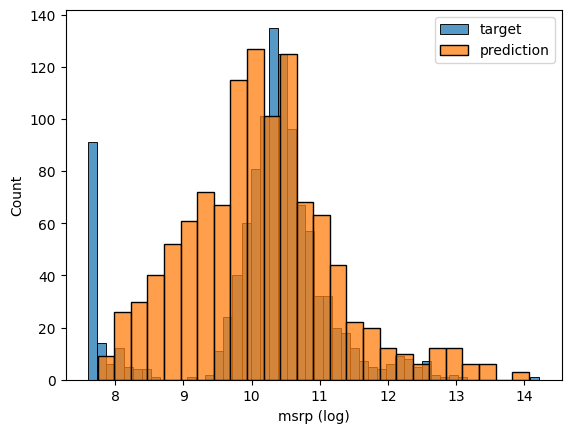

In [97]:
sns.histplot(y_val4, label='target')
sns.histplot(y_val_pred_ridge, label='prediction')
plt.legend()
plt.xlabel('msrp (log)')
plt.show()

In [66]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100]
alpha

[0.001, 0.01, 0.1, 1, 10, 100]

In [67]:
rmses = {}
for r in alpha:
  w_0_ridge, w_ridge = ridge_regression_fit(X_train4, y_train4, r)
  y_val_pred_ridge = linear_regression_predict(w_0_ridge, w_ridge, X_val4)
  rmse_val_ridge = rmse(y_val_pred_ridge, y_val4)
  rmses[r] = rmse_val_ridge

In [70]:
for k,v in rmses.items():
  print(f'alpha: {k} --> rmse: {v:.3f}')

alpha: 0.001 --> rmse: 0.513
alpha: 0.01 --> rmse: 0.513
alpha: 0.1 --> rmse: 0.513
alpha: 1 --> rmse: 0.514
alpha: 10 --> rmse: 0.519
alpha: 100 --> rmse: 0.656


We don't see any improvement using different values of alpha, so we'll keep the one initial one. From this point and on we can use other categorical features hopefully to improve the performance of our model.

In [87]:
newfeature = np.unique(df['vehicle_size'])
newfeature

array(['compact', 'large', 'midsize'], dtype=object)

In [88]:
df_new3 = df_new2.copy()

for value in newfeature:
  feature = f'vehicle_size_{value}'
  df_new3[feature] = (df_new3['vehicle_size'] == value).astype(int)

df_new3.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,...,city_mpg,popularity,msrp,number_of_doors_2,number_of_doors_3,number_of_doors_4,age,vehicle_size_compact,vehicle_size_large,vehicle_size_midsize
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,compact,...,19,3916,46135,1,0,0,6,1,0,0
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,...,19,3916,40650,1,0,0,6,1,0,0
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,...,20,3916,36350,1,0,0,6,1,0,0
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,...,18,3916,29450,1,0,0,6,1,0,0
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,...,18,3916,34500,1,0,0,6,1,0,0


In [89]:
cols5 = ['engine_hp', 'city_mpg', 'age', 'number_of_doors_2', 'number_of_doors_3', 'number_of_doors_4', 'vehicle_size_compact', 'vehicle_size_large', 'vehicle_size_midsize', 'msrp']
cols5

['engine_hp',
 'city_mpg',
 'age',
 'number_of_doors_2',
 'number_of_doors_3',
 'number_of_doors_4',
 'vehicle_size_compact',
 'vehicle_size_large',
 'vehicle_size_midsize',
 'msrp']

In [90]:
X_train5, X_val5, X_test5, y_train5, y_val5, y_test5 = split(df_new3[cols5])
print(f'The shape of X_train5: {X_train5.shape}')
print(f'The shape of y_train5: {y_train5.shape}\n')
print(f'The shape of X_val5: {X_val5.shape}')
print(f'The shape of y_val5: {y_val5.shape}\n')
print(f'The shape of X_test5: {X_test5.shape}')
print(f'The shape of y_test5: {y_test5.shape}')

train: 7767 	 val: 1109 	 test: 2221
The shape of X_train5: (7767, 9)
The shape of y_train5: (7767,)

The shape of X_val5: (1109, 9)
The shape of y_val5: (1109,)

The shape of X_test5: (2221, 9)
The shape of y_test5: (2221,)


In [91]:
w_0_ridge1, w_ridge1 = ridge_regression_fit(X_train5, y_train5)

In [92]:
y_val_pred_ridge1 = linear_regression_predict(w_0_ridge1, w_ridge1, X_val5)
rmse_val_ridge1 = rmse(y_val_pred_ridge1, y_val5)
print(f'The RMSE of the model using the val set is: {rmse_val_ridge1:.3f}')

The RMSE of the model using the val set is: 0.515


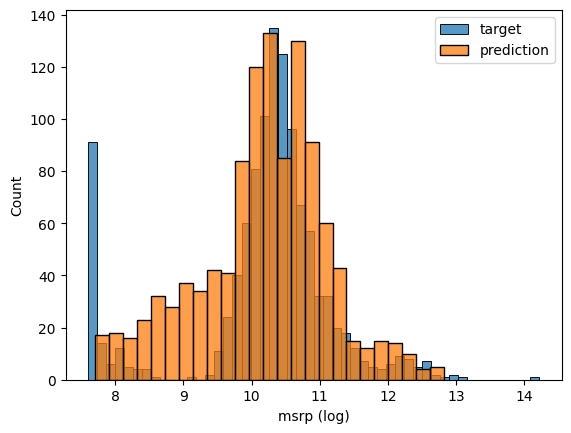

In [93]:
sns.histplot(y_val5, label='target')
sns.histplot(y_val_pred_ridge1, label='prediction')
plt.legend()
plt.xlabel('msrp (log)')
plt.show()